In [1]:
""" Covid 19 data

Considerations when dealing with pandemic data: 

Inflection point: the growth of casses follow an exponential function (cumulated cases over time), at some point this will stop. Either because everyone has been infected or people that are infected can't infect anyone else. A usefull thing to know is when this curve will shift (inflection). In order to calculate this we need to compare the number of cases today from the number of cases from the previous day (growth ratio). If we have a ratio that is greater than one, it means we still follow the exponential curve. If we have a ratio smaller than one, it means we have reached the inflection point. """

" Covid 19 data\n\nConsiderations when dealing with pandemic data: \n\nInflection point: the growth of casses follow an exponential function (cumulated cases over time), at some point this will stop. Either because everyone has been infected or people that are infected can't infect anyone else. A usefull thing to know is when this curve will shift (inflection). In order to calculate this we need to compare the number of cases today from the number of cases from the previous day (growth ratio). If we have a ratio that is greater than one, it means we still follow the exponential curve. If we have a ratio smaller than one, it means we have reached the inflection point. "

In [2]:
""" Step 1: calculate the number of cumulative cases over time. 
Step 2: get the number of new cases each day. 
Create and manipilate columns"""

' Step 1: calculate the number of cumulative cases over time. \nStep 2: get the number of new cases each day. \nCreate and manipilate columns'

In [3]:
import pandas as pd

In [4]:
path_to_file = "/Users/y1ngyang/Desktop/python/pandas_training"
data = pd.read_csv(path_to_file + "/covid-19.csv")
data = data.iloc[:, 1:]
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-04-23,23,4,2020,933,264,Belgium,BE,BEL,11422068.0,Europe
1,2020-04-22,22,4,2020,973,170,Belgium,BE,BEL,11422068.0,Europe
2,2020-04-21,21,4,2020,1487,145,Belgium,BE,BEL,11422068.0,Europe
3,2020-04-20,20,4,2020,1313,230,Belgium,BE,BEL,11422068.0,Europe
4,2020-04-19,19,4,2020,1045,290,Belgium,BE,BEL,11422068.0,Europe


In [5]:
""" Focus on U.S data by filtering """
mask = data["geoId"] == "US"
us_data = data[mask]
us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
575,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America
576,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America
577,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America
578,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America
579,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America


In [6]:
""" Noticed that index starts at 575. Reset index"""
us_data.reset_index()

,index,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,575,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America
1,576,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America
2,577,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America
3,578,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America
4,579,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America
...,...,...,...,...,...,...,...,...,...,...,...,...
110,685,2020-01-04,4,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America
111,686,2020-01-03,3,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America
112,687,2020-01-02,2,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America
113,688,2020-01-01,1,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America


In [7]:
""" Since I only want to work with the U.S data, I'm going to delete the other index to have a cleaner look. Update the variable"""
us_data = us_data.reset_index(drop=True)

In [8]:
""" Create new column for cumulated cases by making a new [key] """
us_data["cumulated_cases"] = 0
us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases
0,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America,0
1,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America,0
2,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America,0
3,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America,0
4,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America,0


In [9]:
""" observing the date, it starts from the most recent one. We need change the index to the least recent one in the data frame. Create a list comp. What is the last index in the data frame?"""
len(us_data)

115

In [10]:
us_data.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases
110,2020-01-04,4,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0
111,2020-01-03,3,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0
112,2020-01-02,2,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0
113,2020-01-01,1,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0
114,2019-12-31,31,12,2019,0,0,United_States_of_America,US,USA,327167434.0,America,0


In [11]:
total_rows = len(us_data)
print(total_rows)

115


In [12]:
for i in range(total_rows -2, -1, -1):
    us_data.loc[i, "cumulated_cases"] = us_data.loc[i, "cases"] + us_data.loc[i +1, "cumulated_cases"]

In [13]:
us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases
0,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America,842629
1,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America,825041
2,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America,787752
3,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America,759687
4,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America,735086


In [14]:
us_data["new_cases"] = 0 
for i in range(total_rows - 2, -1, -1):
    us_data.loc[i, "new_cases"] = us_data.loc[i, "cumulated_cases"] - us_data.loc[i +1, "cumulated_cases"]

In [15]:
us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases,new_cases
0,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America,842629,17588
1,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America,825041,37289
2,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America,787752,28065
3,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America,759687,24601
4,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America,735086,32922


In [16]:
us_data["growth_ratio"] = 0
for i in range(total_rows - 2, -1, -1):
    us_data.loc[i, "growth_ratio"] = us_data.loc[i, "new_cases"] / us_data.loc[i + 1, "new_cases"]

us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases,new_cases,growth_ratio
0,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America,842629,17588,0.471667
1,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America,825041,37289,1.328666
2,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America,787752,28065,1.140807
3,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America,759687,24601,0.747251
4,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America,735086,32922,1.067752


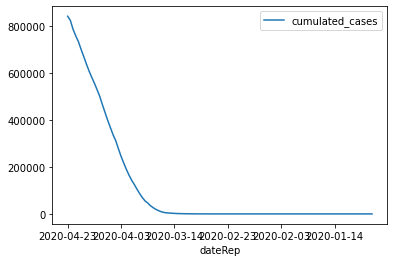

In [17]:
"visualization: line plot"
us_data.plot.line(x="dateRep", y="cumulated_cases")

In [18]:
""" fix the graph by sorting values """
us_data = us_data.sort_values("dateRep")
us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases,new_cases,growth_ratio
114,2019-12-31,31,12,2019,0,0,United_States_of_America,US,USA,327167434.0,America,0,0,0.0
113,2020-01-01,1,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0,0,NaN
112,2020-01-02,2,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0,0,NaN
111,2020-01-03,3,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0,0,NaN
110,2020-01-04,4,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0,0,NaN


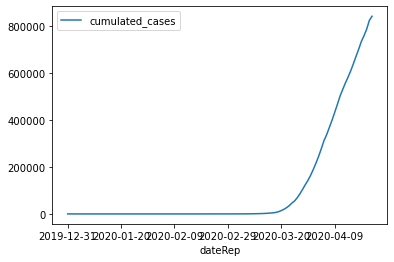

In [19]:
us_data.plot.line(x="dateRep", y="cumulated_cases")

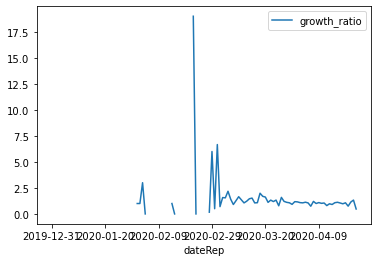

In [20]:
""" visualize the growth ratio metric """
us_data.plot.line(x="dateRep", y="growth_ratio")

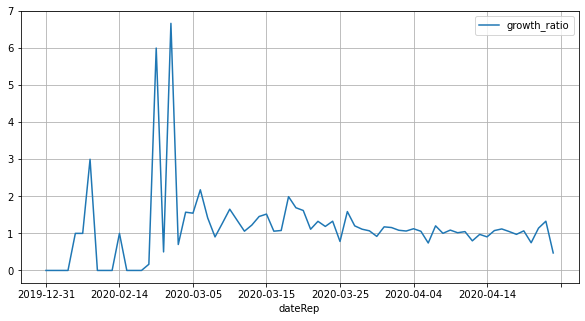

In [24]:
""" cleaner visualization of the growth ratio metric. Are we over or under 1 as a growth ratio? using grid to answer that question. We are stedily over one, the virus is still spreading exponentially"""
mask = us_data["growth_ratio"] <= 7.5
us_data[mask].plot.line(x="dateRep", y="growth_ratio", figsize=(10, 5), grid=True)

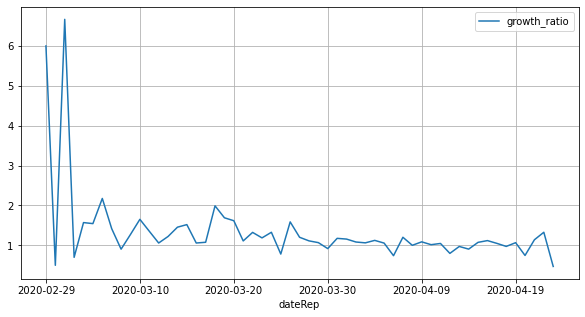

In [26]:
mask = us_data["dateRep"] >= "2020-02-29"
us_data[mask].plot.line(x="dateRep", y="growth_ratio", figsize=(10, 5), grid=True)
